In [8]:
import datetime as dt
import urllib, re, math
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.linear_model import LinearRegression
# change plot size
plt.rcParams['figure.dpi'] = 150
# change max number of rows to show
pd.set_option('display.max_rows', 300)

In [9]:
URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
#      "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"

files = ["time_series_19-covid-Confirmed.csv","time_series_19-covid-Deaths.csv","time_series_19-covid-Recovered.csv"]
file = files[0]
link =URL+file

#read csv can read urls directly
df = pd.read_csv(link)
# set row indices, only have dates for columns ids
df =df.set_index(["Country/Region","Lat","Long","Province/State"])

d = df.columns[-1]
print(d)
if sum(df[d].apply(math.isnan)):
    print("missing samples go back one day")
    data = df.drop(columns=d)
else:
    data = df

3/10/20


In [10]:
# usa has a problem cities and states overlap
usStates="""
Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming
"""

US = usStates.split('\n')[1:-1]
#data.loc[(US)]
sp.size(US)
#usStates.split('\n')[1:-1]
#US = list(set(data.index.levels[3])&set(US))
print(data.loc[("US",slice(None),slice(None),US)].sum()[-1])
print(data.loc["US"].sum()[-1])
#data.filter(like=',',axis=0)
#data.loc["US"]
#data.loc["US"]
#data.loc[("US",slice(None),slice(None), lambda df.: df.index.levels[3].str.contains(','))]


887
1670


In [11]:


# create new groups
# dont use string for UR, but the 50 states
euro      = ["Germany","France","Italy","Sweden","Switzerland","Spain","Portugal","Belgium","Iceland","Ireland"]
northAmer = ["US","Canada","Mexico"],
asia      = ["South Korea","Taiwan","Japan"]   
middleEast=["Iraq","Egypt","Iran"]
noChin = data.index.levels[0][data.index.levels[0]!="Mainland China"]
countries={ "No China":noChin,
            "North America":northAmer,
            "Euro":euro,            
            "middle east":middleEast,
            "China":"Mainland China",
            "Japan":"Japan",
            "Italy":"Italy",            
            "South Korea":"Republic of Korea",
            "US":"US"}


4
0.05411335115139452
1.1326959590644166
4
-0.032868685501834825
0.9271101046165774


<Figure size 900x600 with 0 Axes>

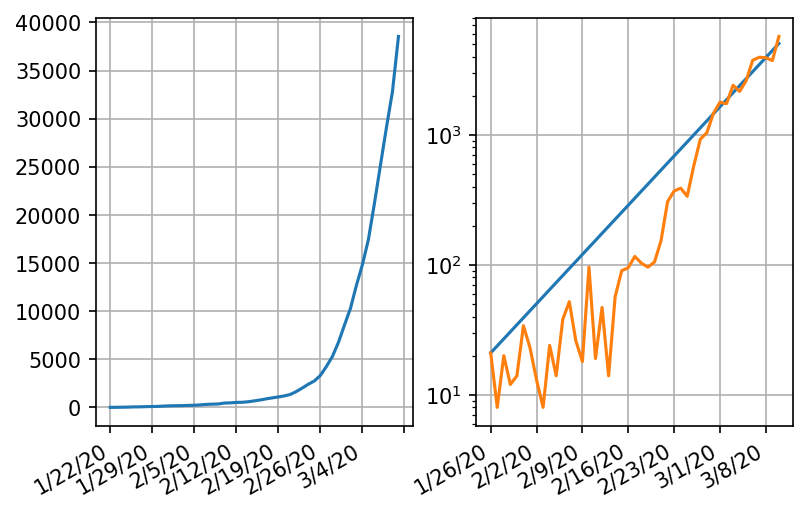

<Figure size 900x600 with 0 Axes>

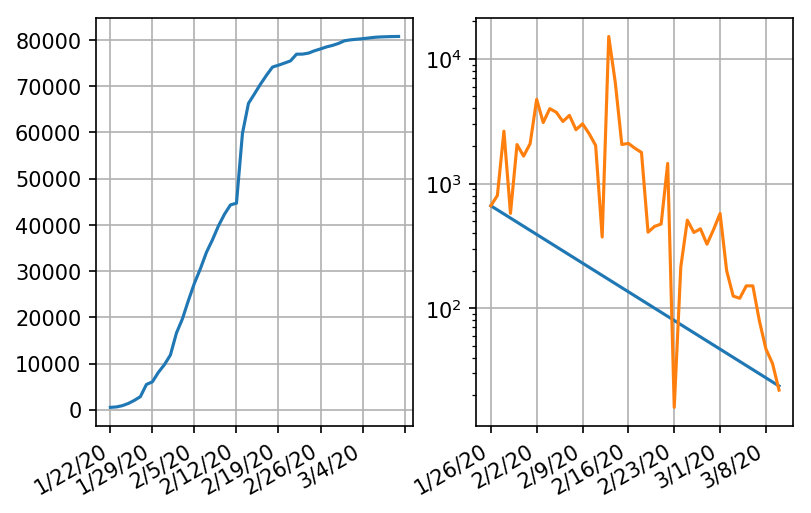

In [12]:
#assume (1+E*P) is 120%
import matplotlib.ticker as mticker

myLocator = mticker.MultipleLocator(7)

#determine slope and plot
for name in [noChin,"Mainland China"]:
    plt.figure()
    vals= data.loc[name].sum().diff()
    idx = np.argwhere(vals>0)[3][0]

    print(idx)
    vals = vals[idx:]
    lv = sp.log10(vals)
    m=(lv[-1]-lv[0])/(sp.size(lv))

    print(m)
    print(math.pow(10,m))
    
    fig, ax = plt.subplots(1,2)
    #---
    ax[1].plot(vals.index,pow(10,np.arange(0,sp.size(lv))*m+lv[0]))
    ax[1].semilogy(vals)
    
    ax[1].xaxis.set_major_locator(myLocator)
    ax[1].grid()
    fig.autofmt_xdate()
    
    #---
    ax[0].plot(data.loc[name].sum())        
    ax[0].xaxis.set_major_locator(myLocator)
    ax[0].grid()
    fig.autofmt_xdate()
    
#print(vals.index)
#print(sp.size(lv))

#plt.plot()
#sp.size(vals)
#regressor.fit(vals.index.vals.values)
#vals.index[1].apply(toordinal)
#a = pd.to_datetime(vals.index)
#Xs = pd.to_datetime(vals.index).strftime("%Y%m%d").astype(int)


# Create linear regression object
#from sklearn import datasets, linear_model
#regr = linear_model.LinearRegression()
#regr.fit([Xs],[vals])
#regr.coef_

No handles with labels found to put in legend.


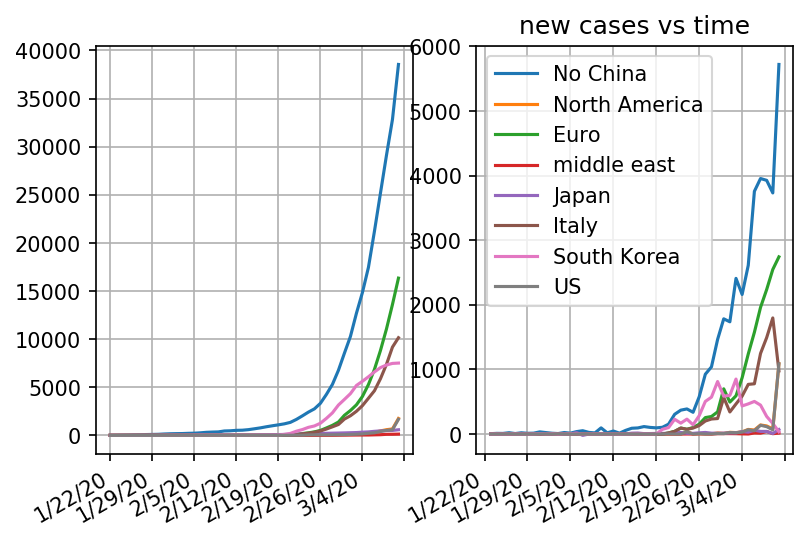

In [13]:
#ignore china here
fig, ax =plt.subplots(1,2)
for name in countries.keys():
    if name =="China":continue
    country = countries[name]
    ax[0].plot(data.loc[(country)].sum(),label=name)
ax[0].xaxis.set_major_locator(myLocator)
ax[0].grid()
plt.legend()
plt.title("total cases over time");


for name in countries.keys():
    if name =="China":continue
    country = countries[name]
    
    vals= data.loc[(country)].sum().diff()
    ax[1].plot(vals,label=name)
ax[1].xaxis.set_major_locator(myLocator)
ax[1].grid()
fig.autofmt_xdate()

plt.legend()
plt.title("new cases vs time");

In [14]:
#raw data
data.loc["US"].sum()

1/22/20       1
1/23/20       1
1/24/20       2
1/25/20       2
1/26/20       5
1/27/20       5
1/28/20       5
1/29/20       5
1/30/20       5
1/31/20       7
2/1/20        8
2/2/20        8
2/3/20       11
2/4/20       11
2/5/20       11
2/6/20       11
2/7/20       11
2/8/20       11
2/9/20       11
2/10/20      11
2/11/20      12
2/12/20      12
2/13/20      13
2/14/20      13
2/15/20      13
2/16/20      13
2/17/20      13
2/18/20      13
2/19/20      13
2/20/20      13
2/21/20      15
2/22/20      15
2/23/20      15
2/24/20      51
2/25/20      51
2/26/20      57
2/27/20      58
2/28/20      60
2/29/20      68
3/1/20       74
3/2/20       98
3/3/20      118
3/4/20      149
3/5/20      217
3/6/20      267
3/7/20      403
3/8/20      518
3/9/20      584
3/10/20    1670
dtype: int64

# Smarter  model

Y' = A * sech^2( B * (t-C) )

Y = A/B * ( tanh( B * (t-C)) + 1 )

[ The equation for Y is just the integral of the equation for Y', where I have set the constant of integration to make the curve start at zero cases so far. ]


A = the peak infection rate (4600 case/day)

B = the width parameter (0.116)

C = the center date (2/6/2020 3AM)

sech z = 1/cosh z

       = 2/(e^z+e^-z)


 
# references

franklin antonio

https://royalsocietypublishing.org/doi/pdf/10.1098/rspa.1927.0118

 

The Epidemic Curve parts I & II, Wilson & Burke, 1942,1943

Proc Natl Acad Sci U S A. 1942 Sep; 28(9): 361–367

Proc Natl Acad Sci U S A. 1943 Jan; 29(1): 43–48

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1078491/pdf/pnas01644-0025.pdf

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1078553/pdf/pnas01648-0050.pdf


In [15]:
(np.exp(0)+np.exp(0))/2.
np.cosh(1)
Nd
C

NameError: name 'Nd' is not defined

47
48


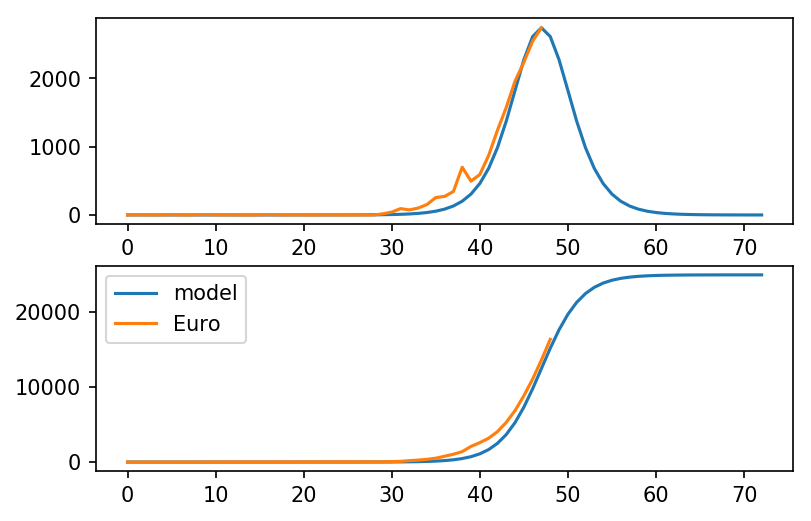

In [18]:

#ctr = "South Korea"
#ctr = "Italy"
filtV = "Euro"
for ctr in countries.keys():
    
    if not filtV in ctr: continue
    
        
    Nd = data.loc[countries[ctr]].sum().diff().values[1:]
    
    A=max(Nd)
    B=0.22

    C=np.argmax(Nd)

    # must be in days
    print(C)
    print(sp.size(Nd))
    t = np.arange(0,sp.size(Nd)+25)
    fig, ax = plt.subplots(2,1,)
    ax[0].plot(A/(np.cosh( B * (t-C))**2),label="model")
    ax[0].plot(Nd,label=ctr)
    ax[1].grid()
    ax[1].plot(A/B * ( np.tanh( B * (t-C)) + 1 ),label="model")
    ax[1].plot(data.loc[countries[ctr]].sum().values,label=ctr)
    ax[1].grid()
    plt.legend()
    #plt.title("total cases over time");
